In [461]:
from IPython.core.display import HTML as Center

Center(""" <style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style> """)


# Лабораторная работа $№2$ 

# «Градиентный спуск»
<font size="4">**Вариант $№6$**</font>

Найти с заданной точностью точку минимума и минимальное значение целевой функции. Начинать всегда с квадратичной функции (аналитически для нее найти точное решение, с котором сравнивать полученное численное). Далее исследовать функцию Розенброка  $f(x,y)= \alpha (x^2 - y)^2 + (x-1)^2$ различными параметрами $\alpha$. При исследовании для каждой функции брать два параметра точности поиска $\varepsilon = 0.01$ и $\varepsilon = 0.00001$. 
 
   Также для каждой функции и каждого параметра точности поиска взять две различные (существенно различные) начальные точки. Начальные точки выбрать самостоятельно. В методах, в которых необходимо проводить одномерную минимизацию (например в наискорейшем спуске), использовать свой метод золотого сечения, реализованный в лабораторной работе №1.

   В результате исследований должно быть выявлено влияние на стоимость методов (количество вычисленных значений целевой функции)
    
   • параметров точности поиска;
    
   • начальной точки;
    
   • выпуклости (переход от квадратичной функции к функции Розенброка);
    
   • овражности функции (параметра  в функции Розенброка).

# Постановка задачи
1) $f_1(x, y) = 5x^2 + 4xy + 2y^2 + 4\sqrt5 (x+y) + 51$;

   $f_1(x, y) \to min,\phantom{x} (x, y) \in \mathbb{R}^2$.
 
$\phantom{x}$ 
2) $f_2(x, y) = \alpha (x^2 - y)^2 + (x-1)^2$, $\phantom{x}\alpha \in \{1, 20\}$;

   $\phantom{xxi}$ $f_2(x, y) \to min,\phantom{x} (x, y) \in \mathbb{R}^2$.


Опишем целевые функции:

In [462]:
import numpy as np
def f1(x, y):
    return 5*x*x + 4*x*y + 2*y*y + 4*np.sqrt(5)*(x+y) + 51
def f21(x, y):
    return (x*x - y)**2 + (x-1)**2
def f22(x, y):
    return 20*(x*x - y)**2 + (x-1)**2

Опишем функции-градиенты для целевых функций:

In [463]:
def gradf1(x, y):
    return 0

Начальные параметры:

In [464]:
eps1 = 0.01
eps2 = 10**(-5)

Представим целевую функцию графически:

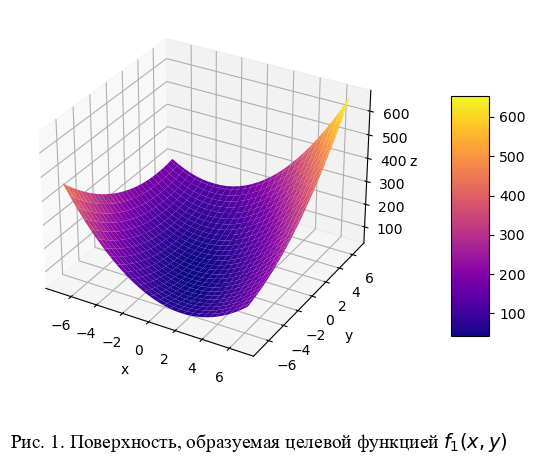

In [465]:
import matplotlib.pyplot as plt
from matplotlib import cm

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

X = np.arange(-7, 7, 0.25)
Y = np.arange(-7, 7, 0.25)
X, Y = np.meshgrid(X, Y)
F1 = np.vectorize(f1)
Z = F1(X, Y)

surf = ax.plot_surface(X, Y, Z, cmap=cm.plasma,
                       linewidth=1, antialiased=True)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.zaxis.labelpad=-0.6 

cbaxes = fig.add_axes([0.9, 0.2, 0.06, 0.5])  
cb = plt.colorbar(surf, cax = cbaxes)

plt.title('Рис. 1. Поверхность, образуемая целевой функцией $f_1(x,y)$',
             fontsize=14, fontname='Times New Roman',y=-0.5, x = -5)
plt.show()

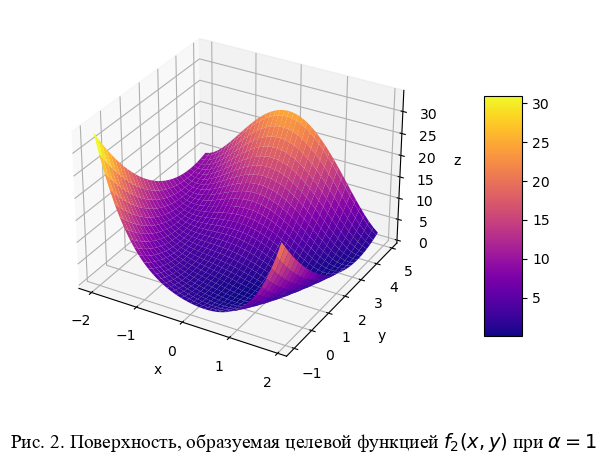

In [466]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

X = np.arange(-2, 2,0.1)
Y = np.arange(-1, 5, 0.1)
X, Y = np.meshgrid(X, Y)
F2 = np.vectorize(f21)
Z = F2(X, Y)

surf = ax.plot_surface(X, Y, Z, cmap=cm.plasma,
                       linewidth=1, antialiased=True)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.zaxis.labelpad=4.5

cbaxes = fig.add_axes([0.9, 0.2, 0.06, 0.5]) 
cb = plt.colorbar(surf, cax = cbaxes)

plt.title('Рис. 2. Поверхность, образуемая целевой функцией $f_2(x,y)$ при $α = 1$',
             fontsize=14, fontname='Times New Roman',y=-0.5, x = -4.7)
 
plt.show()

# Реализация метода наискорейшего спуска

Вспомогательные функции:

In [467]:
def deriv_x(func, x, y, eps):
    h = eps/4
    return (func(x+h, y)-func(x-h, y))/(2*h)
def deriv_y(func, x, y, eps):
    h = eps/4
    return (func(x, y+h)-func(x, y-h))/(2*h)
def GoldenRatioMinSearch(func, a, b, eps):
    tau = (1 + np.sqrt(5))/2
    length = b - a
    x1 = a + (1 - 1/tau)*length
    x2 = a + length/tau
    f1 = func(x1)
    f2 = func(x2)
    while length > eps:
        if f1 < f2:
            b = x2
            x2 = x1
            x1 = a + b - x2
            f2 = f1
            f1 = func(x1)
        else:
            a  = x1
            x1 = x2
            x2 = a + b - x1
            f1 = f2
            f2 = func(x2)
        length = b - a
    return (a+b)/2

In [468]:
def SteepestDescentMinSearch(func, eps, x0, y0):
    x, y = x0, y0
    wx, wy = -deriv_x(func, x, y, eps), -deriv_y(func, x, y, eps) 
    length = np.sqrt(wx*wx + wy*wy)
    def psi(hi):
        return func(x + hi*wx, y + hi*wy)
    while length > eps:
        hi = GoldenRatioMinSearch(psi, 0, 0.5, eps)
        x += hi*wx
        y += hi*wy 
        wx, wy = -deriv_x(func, x, y, eps), -deriv_y(func, x, y, eps) 
        length = np.sqrt(wx*wx + wy*wy)
    return x, y, func(x, y)

In [469]:
SteepestDescentMinSearch(f1, eps2, -0.5, 2.5)

(-1.4341648566958818e-06, -2.236065638623386, 41.00000000000781)

Проанализируем метод наискорейшего спуска. Для этого напишем его реализацию с выводом необходимой информации о количестве итераций и промежуточных значениях.

In [470]:
def InfoGoldenRatioMinSearch(func, a, b, eps):
    fcalls = 0
    tau = (1 + np.sqrt(5))/2
    length = b - a
    x1 = a + (1 - 1/tau)*length
    x2 = a + length/tau
    f1 = func(x1)
    f2 = func(x2)
    fcalls += 2
    while length > eps:
        if f1 < f2:
            b = x2
            x2 = x1
            x1 = a + b - x2
            f2 = f1
            f1 = func(x1)
            fcalls += 1
        else:
            a  = x1
            x1 = x2
            x2 = a + b - x1
            f1 = f2
            f2 = func(x2)
            fcalls += 1
        length = b - a
    res = (a+b)/2
    return res, fcalls
def InfoSteepestDescentMinSearch(func, eps, x0, y0):
    x, y = x0, y0
    xvals = [x]
    yvals = [y]
    iterations = 0
    mid_iterations = 0
    wx, wy = -deriv_x(func, x, y, eps), -deriv_y(func, x, y, eps) 
    gradcalls = 1
    fcalls = 0
    length = np.sqrt(wx*wx + wy*wy)
    def psi(hi):
        return func(x + hi*wx, y + hi*wy)
    while length > eps:      
        hi, temp_fcalls = InfoGoldenRatioMinSearch(psi, 0, 1, eps)
        fcalls += temp_fcalls
        x += hi*wx
        y += hi*wy 
        xvals.append(x)
        yvals.append(y)
        wx, wy = -deriv_x(func, x, y, eps), -deriv_y(func, x, y, eps) 
        gradcalls += 1
        length = np.sqrt(wx*wx + wy*wy)
        iterations += 1
    return x, y, func(x, y), xvals, yvals, iterations, fcalls, gradcalls

In [471]:
xmin0_f1, ymin0_f1, fmin0_f1, xs0_f1, ys0_f1, its0_f1, fls0_f1, grs0_f1 = InfoSteepestDescentMinSearch(f1, eps1, 10, 10)

In [472]:
xmin1_f1, ymin1_f1, fmin1_f1, xs1_f1, ys1_f1, its1_f1, fls1_f1, grs1_f1 = InfoSteepestDescentMinSearch(f1, eps2, 10, 10)

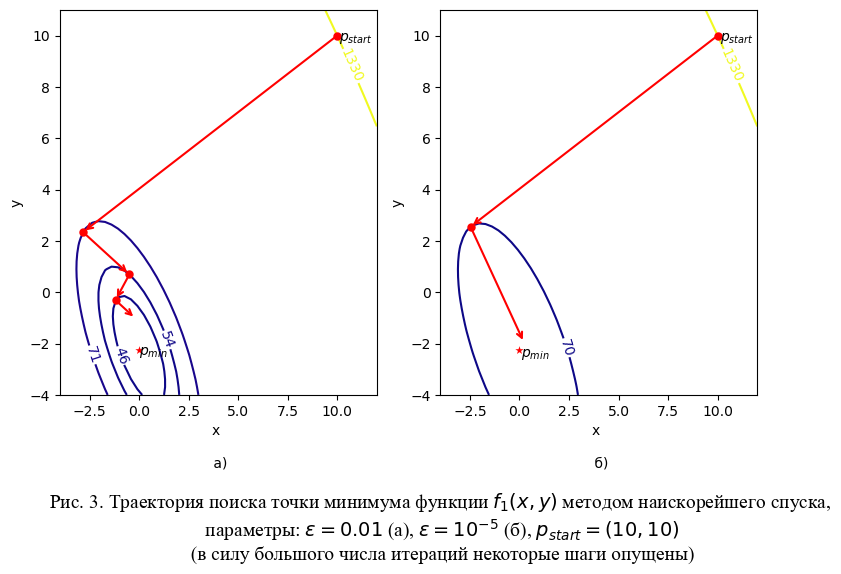

In [473]:
x = np.linspace(-4, 12)
y = np.linspace(-4, 11)
X, Y = np.meshgrid(x, y)
Z = F1(X, Y)
fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(9, 5))
levels1 = []
levels2 = []
ax[0].scatter(xs0_f1[0:4], ys0_f1[0:4], color='red', lw=0.05, zorder=2)
ax[0].scatter(xs0_f1[-1], ys0_f1[-1], color='red', lw=0.05, marker='*', zorder=2)
ax[1].scatter(xs1_f1[0:2], ys1_f1[0:2], color='red', lw=0.05, zorder=2)
ax[1].scatter(xs1_f1[-1], ys1_f1[-1], color='red', lw=0.05, marker='*', zorder=2)
for i in range(0,4):
    levels1.append(f1(xs0_f1[i], ys0_f1[i]))
    ax[0].annotate('', xytext=(xs0_f1[i], ys0_f1[i]), xy=(xs0_f1[i+1], ys0_f1[i+1]),
                   arrowprops={'arrowstyle': '->', 'color': 'r', 'lw': 1.5},
                   va='center', ha='center')
levels1.reverse()
CS1 = ax[0].contour(X, Y, Z, cmap=cm.plasma, levels=levels1, zorder=1)
ax[0].clabel(CS1, CS1.levels,inline=True,inline_spacing = 1)
for i in range(0,2):
    levels2.append(f1(xs1_f1[i], ys1_f1[i]))
    ax[1].annotate('', xytext=(xs1_f1[i], ys1_f1[i]), xy=(xs1_f1[i+1], ys1_f1[i+1]),
                   arrowprops={'arrowstyle': '->', 'color': 'r', 'lw': 1.5},
                   va='center', ha='center')
levels2.reverse()
CS2 = ax[1].contour(X, Y, Z, cmap=cm.plasma, levels=levels2, zorder=1)
ax[1].clabel(CS2, CS2.levels,inline=True,inline_spacing = 1)

ax[0].annotate('$p_{min}$', xytext=(xs0_f1[-1]-0.01, ys0_f1[-1]-0.2), xy=(xs0_f1[-1], ys0_f1[-1]))
ax[0].annotate('$p_{start}$', xytext=(xs0_f1[0]+0.1, ys0_f1[0]-0.2), xy=(xs0_f1[0], ys0_f1[0]))
ax[0].set_xlabel('x \n \n a)')
ax[1].annotate('$p_{min}$', xytext=(xs1_f1[-1]+0.1, ys1_f1[-1]-0.3), xy=(xs1_f1[-1], ys1_f1[-1]))
ax[1].annotate('$p_{start}$', xytext=(xs1_f1[0]+0.1, ys1_f1[0]-0.2), xy=(xs1_f1[0], ys1_f1[0]))
ax[1].set_xlabel('x \n \n б)')
ax[0].set_ylabel('y')
ax[1].set_ylabel('y')
plt.title('Рис. 3. Траектория поиска точки минимума функции $f_1(x, y)$ методом наискорейшего спуска, \n \
параметры: $ε=0.01$ (а), $ε=10^{-5}$ (б), $p_{start}=(10, 10)$ \n \
(в силу большого числа итераций некоторые шаги опущены)',
             fontsize=14, fontname='Times New Roman',y=-0.45, x = 0)
plt.show()

In [474]:
xmin2_f1, ymin2_f1, fmin2_f1, xs2_f1, ys2_f1, its2_f1, fls2_f1, grs2_f1 = InfoSteepestDescentMinSearch(f1, eps1, 1, 1)

In [475]:
xmin3_f1, ymin3_f1, fmin3_f1, xs3_f1, ys3_f1, its3_f1, fls3_f1, grs3_f1 = InfoSteepestDescentMinSearch(f1, eps2, 1, 1)

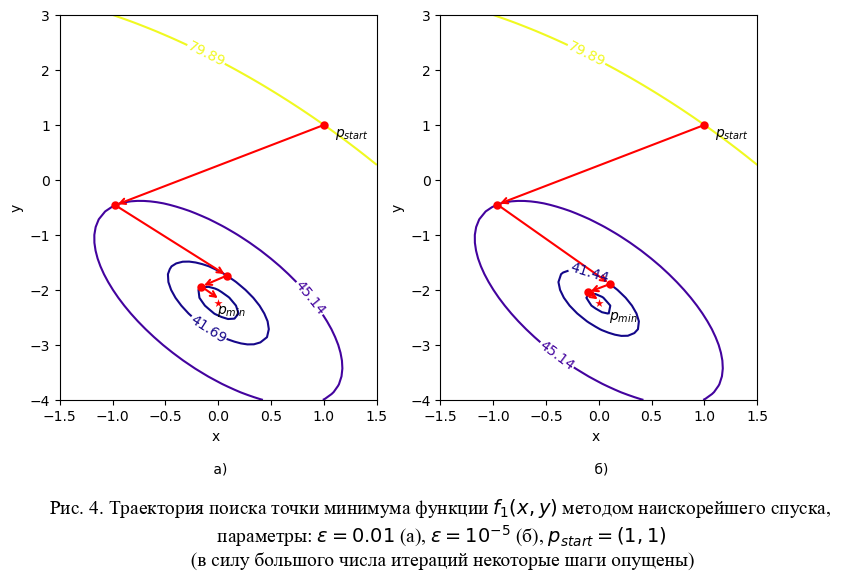

In [476]:
x = np.linspace(-1.5, 1.5)
y = np.linspace(-4, 3)
X, Y = np.meshgrid(x, y)
Z = F1(X, Y)
fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(9, 5))
levels1 = []
levels2 = []
#CS1 = ax[0].contour(X, Y, Z, cmap=cm.plasma, levels=levels)
#CS2 = ax[1].contour(X, Y, Z, cmap=cm.plasma, levels=15)

ax[0].scatter(xs2_f1[0:4], ys2_f1[0:4], color='red', lw=0.05, zorder=2)
ax[0].scatter(xs2_f1[-1], ys2_f1[-1], color='red', lw=0.05, marker='*', zorder=2)
ax[1].scatter(xs3_f1[0:4], ys3_f1[0:4], color='red', lw=0.05, zorder=2)
ax[1].scatter(xs3_f1[-1], ys3_f1[-1], color='red', lw=0.05, marker='*', zorder=2)
for i in range(0,4):
    levels1.append(f1(xs2_f1[i], ys2_f1[i]))
    ax[0].annotate('', xytext=(xs2_f1[i], ys2_f1[i]), xy=(xs2_f1[i+1], ys2_f1[i+1]),
                   arrowprops={'arrowstyle': '->', 'color': 'r', 'lw': 1.5},
                   va='center', ha='center')
levels1.reverse()
CS1 = ax[0].contour(X, Y, Z, cmap=cm.plasma, levels=levels1, zorder=1)
ax[0].clabel(CS1, CS1.levels,inline=True,inline_spacing = 1)
#cbaxes = fig.add_axes([0.99, 0.2, 0.06, 0.5]) 
#cb = plt.colorbar(CS1, cax = cbaxes)
for i in range(0,4):
    levels2.append(f1(xs3_f1[i], ys3_f1[i]))
    ax[1].annotate('', xytext=(xs3_f1[i], ys3_f1[i]), xy=(xs3_f1[i+1], ys3_f1[i+1]),
                   arrowprops={'arrowstyle': '->', 'color': 'r', 'lw': 1.5},
                   va='center', ha='center')
levels2.reverse()
CS2 = ax[1].contour(X, Y, Z, cmap=cm.plasma, levels=levels2, zorder=1)
ax[1].clabel(CS2, CS2.levels,inline=True,inline_spacing = 1)

ax[0].annotate('$p_{min}$', xytext=(xs2_f1[-1]-0.01, ys2_f1[-1]-0.2), xy=(xs2_f1[-1], ys2_f1[-1]))
ax[0].annotate('$p_{start}$', xytext=(xs2_f1[0]+0.1, ys2_f1[0]-0.2), xy=(xs2_f1[0], ys2_f1[0]))
ax[0].set_xlabel('x \n \n a)')
ax[1].annotate('$p_{min}$', xytext=(xs3_f1[-1]+0.1, ys3_f1[-1]-0.3), xy=(xs3_f1[-1], ys3_f1[-1]))
ax[1].annotate('$p_{start}$', xytext=(xs3_f1[0]+0.1, ys3_f1[0]-0.2), xy=(xs3_f1[0], ys3_f1[0]))
ax[1].set_xlabel('x \n \n б)')
ax[0].set_ylabel('y')
ax[1].set_ylabel('y')
plt.title('Рис. 4. Траектория поиска точки минимума функции $f_1(x, y)$ методом наискорейшего спуска, \n \
параметры: $ε=0.01$ (а), $ε=10^{-5}$ (б), $p_{start}=(1, 1)$ \n \
(в силу большого числа итераций некоторые шаги опущены)',
             fontsize=14, fontname='Times New Roman',y=-0.45, x = 0)
plt.show()

In [477]:
xmin0_f21, ymin0_f21, fmin0_f21, xs0_f21, ys0_f21, its0_f21, fls0_f21, grs0_f21 = InfoSteepestDescentMinSearch(f21, eps1, -5, 2)

In [478]:
xmin1_f21, ymin1_f21, fmin1_f21, xs1_f21, ys1_f21, its1_f21, fls1_f21, grs1_f21 = InfoSteepestDescentMinSearch(f21, eps2, -5, 2)

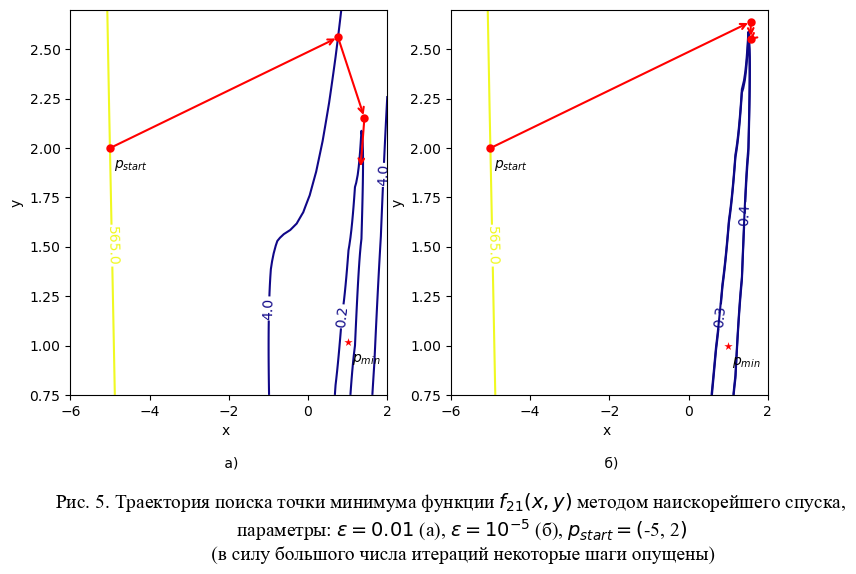

In [479]:
def ExperimentPlot(func, xmin, xmax, ymin, ymax, n1, n2, xs1, ys1, xs2, ys2, ind, xstart, ystart,
                  xspacing, yspacing, fnum = 2):
    x = np.linspace(xmin, xmax)
    y = np.linspace(ymin, ymax)
    X, Y = np.meshgrid(x, y)
    Z = func(X, Y)
    fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(9, 5))
    levels1 = []
    levels2 = []
    ax[0].scatter(xs1[0:n1], ys1[0:n1], color='red', lw=0.05, zorder=2)
    ax[0].scatter(xs1[-1], ys1[-1], color='red', lw=0.05, marker='*', zorder=2)
    ax[1].scatter(xs2[0:n2], ys2[0:n2], color='red', lw=0.05, zorder=2)
    ax[1].scatter(xs2[-1], ys2[-1], color='red', lw=0.05, marker='*', zorder=2)
    for i in range(0, n1):
        levels1.append(func(xs1[i], ys1[i]))
        ax[0].annotate('', xytext=(xs1[i], ys1[i]), xy=(xs1[i+1], ys1[i+1]),
                       arrowprops={'arrowstyle': '->', 'color': 'r', 'lw': 1.5},
                       va='center', ha='center')
    levels1.sort()
    CS1 = ax[0].contour(X, Y, Z, cmap=cm.plasma, levels=levels1, zorder=1)
    ax[0].clabel(CS1, CS1.levels,inline=True,inline_spacing = 1)
    for i in range(0,n2):
        levels2.append(func(xs2[i], ys2[i]))
        ax[1].annotate('', xytext=(xs2[i], ys2[i]), xy=(xs2[i+1], ys2[i+1]),
                       arrowprops={'arrowstyle': '->', 'color': 'r', 'lw': 1.5},
                       va='center', ha='center')
    levels2.sort()
    CS2 = ax[1].contour(X, Y, Z, cmap=cm.plasma, levels=levels2, zorder=1)
    ax[1].clabel(CS2, CS2.levels,inline=True,inline_spacing = 1)

    ax[0].annotate('$p_{min}$', xytext=(xs1[-1]+xspacing, ys1[-1]-yspacing), xy=(xs1[-1], ys1[-1]))
    ax[0].annotate('$p_{start}$', xytext=(xs1[0]+xspacing, ys1[0]-yspacing), xy=(xs1[0], ys1[0]))
    ax[0].set_xlabel('x \n \n a)')
    ax[1].annotate('$p_{min}$', xytext=(xs2[-1]+xspacing, ys2[-1]-yspacing), xy=(xs2[-1], ys2[-1]))
    ax[1].annotate('$p_{start}$', xytext=(xs2[0]+xspacing, ys2[0]-yspacing), xy=(xs2[0], ys2[0]))
    ax[1].set_xlabel('x \n \n б)')
    ax[0].set_ylabel('y')
    ax[1].set_ylabel('y')
    plt.title(f'Рис. {ind}.'+' Траектория поиска точки минимума функции $f_{'+f'{fnum}'+'}(x, y)$ методом наискорейшего спуска, \n \
    параметры: $ε=0.01$ (а), $ε=10^{-5}$ (б), $p_{start}=($'+f'{xstart}, {ystart}'+'$)$ \n \
    (в силу большого числа итераций некоторые шаги опущены)',
                 fontsize=14, fontname='Times New Roman',y=-0.45, x = 0)
    plt.show()
    
ExperimentPlot(np.vectorize(f21), xmin=-6, xmax=2, 
               ymin=0.75, ymax=2.7, n1=3, n2=3, xs1=xs0_f21, ys1=ys0_f21,
               xs2=xs1_f21, ys2=ys1_f21, ind=5, xstart=-5, ystart=2,
              xspacing=0.1, yspacing=0.1, fnum=21)

In [480]:
xmin2_f21, ymin2_f21, fmin2_f21, xs2_f21, ys2_f21, its2_f21, fls2_f21, grs2_f21 = InfoSteepestDescentMinSearch(f21, eps1, 1.5, 1.5)

In [481]:
xmin3_f21, ymin3_f21, fmin3_f21, xs3_f21, ys3_f21, its3_f21, fls3_f21, grs3_f21 = InfoSteepestDescentMinSearch(f21, eps2, 1.5, 1.5)

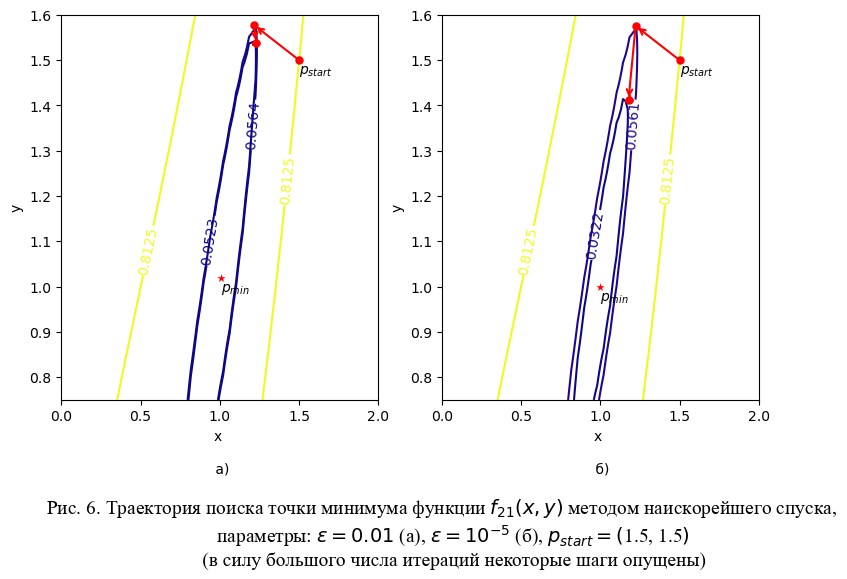

In [482]:
ExperimentPlot(np.vectorize(f21), xmin=0, xmax=2, 
               ymin=0.75, ymax=1.6, n1=3, n2=3, xs1=xs2_f21, ys1=ys2_f21,
               xs2=xs3_f21, ys2=ys3_f21, ind=6, xstart=1.5, ystart=1.5,
              xspacing=0, yspacing=0.03, fnum=21)

In [483]:
xmin0_f22, ymin0_f22, fmin0_f22, xs0_f22, ys0_f22, its0_f22, fls0_f22, grs0_f22 = InfoSteepestDescentMinSearch(f22, eps1, -1.2, 1.7)

In [484]:
xmin1_f22, ymin1_f22, fmin1_f22, xs1_f22, ys1_f22, its1_f22, fls1_f22, grs1_f22 = InfoSteepestDescentMinSearch(f22, eps2, -1.2, 1.7)

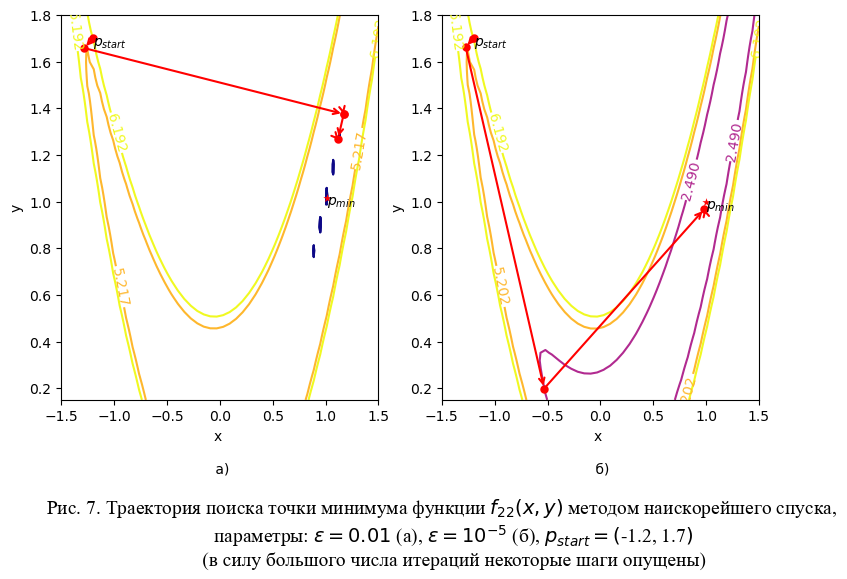

In [485]:
ExperimentPlot(np.vectorize(f22), xmin=-1.5, xmax=1.5, 
               ymin=0.15, ymax=1.8, n1=5, n2=4, xs1=xs0_f22, ys1=ys0_f22,
               xs2=xs1_f22, ys2=ys1_f22, ind=7, xstart=-1.2, ystart=1.7,
              xspacing=0, yspacing=0.03, fnum=22)

In [486]:
import pandas as pd
from IPython.display import HTML

#      # точность / нач точка / кол-во итераций / кол-во вычисленных значений / точка минимума / мин знач / 
# f1
# f21
# f22
funcs = ['f1(x, y)','f1(x, y)','f1(x, y)','f1(x, y)',
         'f21(x, y)', 'f21(x, y)','f21(x, y)', 'f21(x, y)',
         'f22(x, y)','f22(x, y)']
prec = [format(el, '0.1e') for el in [eps1, eps2]]
itercounts = [its0_f1, its1_f1, its2_f1, its3_f1, its0_f21, its1_f21, its2_f21, its3_f21, its0_f22, its1_f22]
funcvals = [fls0_f1, fls1_f1, fls2_f1, fls3_f1, fls0_f21, fls1_f21, fls2_f21, fls3_f21, fls0_f22, fls1_f22]
gradcalls = [grs0_f1, grs1_f1, grs2_f1, grs3_f1, grs0_f21, grs1_f21, grs2_f21, grs3_f21, grs0_f22, grs1_f22]
xmins = [xmin0_f1, xmin1_f1, xmin2_f1, xmin3_f1, xmin0_f21, xmin1_f21, xmin2_f21, xmin3_f21, xmin0_f22, xmin1_f22]
ymins = [ymin0_f1, ymin1_f1, ymin2_f1, ymin3_f1, ymin0_f21, ymin1_f21, ymin2_f21, ymin3_f21, ymin0_f22, ymin1_f22]
fmins = [fmin0_f1, fmin1_f1, fmin2_f1, fmin3_f1, fmin0_f21, fmin1_f21, fmin2_f21, fmin3_f21, fmin0_f22, fmin1_f22]
df1 = pd.DataFrame({"Функция": funcs,
                    "Точность": [prec[0], prec[1], prec[0], prec[1],prec[0], prec[1],
                                prec[0], prec[1], prec[0], prec[1]],
                    "Начальная точка": ['(10, 10)', '(10, 10)', '(1, 1)', '(1, 1)', '(-5, 2)', '(-5, 2)', 
                                        '(1.5, 1.5)', '(1.5, 1.5)', '(-1.2, 1.7)', '(-1.2, 1.7)'],
                    "Кол-во итераций": [elem for elem in itercounts], 
                    "Кол-во вычисленных значений целевой функции": [elem for elem in funcvals],
                    "Кол-во вычисленных градиентов": [elem for elem in gradcalls],
                    "Точка минимума": [f'({xmins[0]: 0.1f}, {ymins[0]: 0.1f})',
                                     f'({xmins[1]: 0.5f}, {ymins[1]: 0.5f})',
                                     f'({xmins[2]: 0.1f}, {ymins[2]: 0.1f})',
                                     f'({xmins[3]: 0.5f}, {ymins[3]: 0.5f})',
                                     f'({xmins[4]: 0.1f}, {ymins[4]: 0.1f})',
                                     f'({xmins[5]: 0.5f}, {ymins[5]: 0.5f})',
                                     f'({xmins[6]: 0.1f}, {ymins[6]: 0.1f})',
                                     f'({xmins[7]: 0.5f}, {ymins[7]: 0.5f})',
                                     f'({xmins[8]: 0.1f}, {ymins[8]: 0.1f})',
                                     f'({xmins[9]: 0.5f}, {ymins[9]: 0.5f})'],
                    "Минимальное значение функции": [f'{fmins[0]: 0.1f}',
                                                f'{fmins[1]: 0.5f}',
                                                f'{fmins[2]: 0.1f}',
                                                f'{fmins[3]: 0.5f}',
                                                f'{fmins[4]: 0.1f}',
                                                f'{fmins[5]: 0.5f}',
                                                f'{fmins[6]: 0.1f}',
                                                f'{fmins[7]: 0.5f}',
                                                f'{fmins[8]: 0.1f}',
                                                f'{fmins[9]: 0.5f}']
                   })
s = df1.style.hide(axis="index").set_caption("Табл. 1. Результаты поиска минимумов функций методом наискорейшего спуска")
cell_hover = {  # for row hover use <tr> instead of <td>
    'selector': 'td:hover',
    'props': [('background-color', '#ffffb3')]
}
headers = {
    'selector': 'th:not(.index_name)',
    'props': 'background-color: #000066; color: white;'
}
s.set_table_styles([cell_hover, headers])
s.set_table_styles([
    {'selector': 'th.col_heading', 'props': 'text-align: center;'},
    {'selector': 'th.col_heading.level0', 'props': 'font-size: 1.4em;'},
    {'selector': 'td', 'props': 'text-align: center; font-weight: bold; font-size: 16px;'},
    #{'selector': 'td:nth-child(4)', 'props': 'text-align: left; font-weight: bold; font-size: 16px'},
    #{'selector': 'td:nth-child(5)', 'props': 'text-align: left; font-weight: bold; font-size: 16px;'},
    {'selector': 'caption', 'props': [('color', 'black'),('font-size', '18px'),('text-align','right'),
                                     ('font-family', 'Times New Roman')]},
], overwrite=False)
s.set_table_styles([{'selector': 'th', 'props': 'border-left: 1px solid white'},
            {'selector': 'td', 'props': 'border-left: 1px solid #000066'}], overwrite=False)

s

Функция,Точность,Начальная точка,Кол-во итераций,Кол-во вычисленных значений целевой функции,Кол-во вычисленных градиентов,Точка минимума,Минимальное значение функции
"f1(x, y)",1.0e-02,"(10, 10)",19,228,20,"(-0.0, -2.2)",41.0
"f1(x, y)",1.0e-05,"(10, 10)",9,234,10,"(-0.00000, -2.23607)",41.00000
"f1(x, y)",1.0e-02,"(1, 1)",8,96,9,"( 0.0, -2.2)",41.0
"f1(x, y)",1.0e-05,"(1, 1)",13,338,14,"(-0.00000, -2.23607)",41.00000
"f21(x, y)",1.0e-02,"(-5, 2)",82,984,83,"( 1.0, 1.0)",0.0
"f21(x, y)",1.0e-05,"(-5, 2)",175,4550,176,"( 1.00001, 1.00002)",0.00000
"f21(x, y)",1.0e-02,"(1.5, 1.5)",41,492,42,"( 1.0, 1.0)",0.0
"f21(x, y)",1.0e-05,"(1.5, 1.5)",157,4082,158,"( 1.00001, 1.00002)",0.00000
"f22(x, y)",1.0e-02,"(-1.2, 1.7)",537,6444,538,"( 1.0, 1.0)",0.0
"f22(x, y)",1.0e-05,"(-1.2, 1.7)",1658,43108,1659,"( 0.99999, 0.99998)",0.00000


# Реализация метода градиентного спуска с дроблением шага

In [487]:
def StepSplitDescentMinSearch(func, eps, x0, y0, hi0):
    x, y = x0, y0
    w = 0.5
    hi = hi0
    v = 1/2
    f = func(x, y)
    wx, wy = -deriv_x(func, x, y, eps), -deriv_y(func, x, y, eps) 
    length = np.sqrt(wx*wx + wy*wy)
    while length > eps:
        xk, yk = x + hi*wx, y + hi*wy
        while func(x, y) - func(xk, yk) < w*hi*length*length:
            hi *= v
            xk, yk = x + hi*wx, y + hi*wy
        x, y = xk, yk
        wx, wy = -deriv_x(func, x, y, eps), -deriv_y(func, x, y, eps) 
        length = np.sqrt(wx*wx + wy*wy)
    return x, y, func(x, y)

In [488]:
StepSplitDescentMinSearch(f21, eps2, -1, 2.5, 0.0009)

(0.999988848832962, 0.9999730787932655, 1.456836596605636e-10)

Проанализируем метод градиентного спуска с дроблением шага. Для этого напишем его реализацию с выводом необходимой информации о количестве итераций и промежуточных значениях. 

In [489]:
def InfoStepSplitDescentMinSearch(func, eps, x0, y0, hi0):
    iterations = 0
    fcalls = 0
    x, y = x0, y0
    xvals = [x]
    yvals = [y]
    w = 0.5
    hi = hi0
    v = 0.6
    wx = -deriv_x(func, x, y, eps) 
    wy = -deriv_y(func, x, y, eps) 
    gradcalls = 1
    length = np.sqrt(wx*wx + wy*wy)
    while length > eps:
        xk = x + hi*wx
        yk = y + hi*wy
        while func(x, y) - func(xk, yk) < w*hi*length*length:
            hi *= v
            xk = x + hi*wx
            yk = y + hi*wy
            fcalls += 2
        x, y = xk, yk
        xvals.append(x)
        yvals.append(y)
        wx = -deriv_x(func, x, y, eps) 
        wy = -deriv_y(func, x, y, eps) 
        gradcalls += 1
        length = np.sqrt(wx*wx + wy*wy)
        iterations += 1
    return x, y, func(x, y), xvals, yvals, iterations, fcalls, gradcalls

In [514]:
xmin0_f1, ymin0_f1, fmin0_f1, xs0_f1, ys0_f1, its0_f1, fls0_f1, grs0_f1 = InfoStepSplitDescentMinSearch(f1, eps1, 10, 10, 0.98)

In [515]:
xmin1_f1, ymin1_f1, fmin1_f1, xs1_f1, ys1_f1, its1_f1, fls1_f1, grs1_f1 = InfoStepSplitDescentMinSearch(f1, eps2, 10, 10, 0.98)

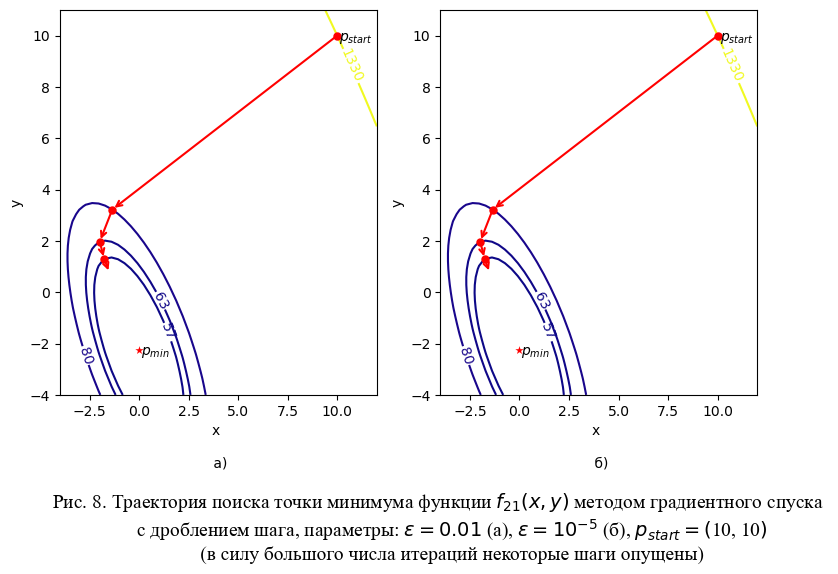

In [516]:
def ExperimentPlot2(func, xmin, xmax, ymin, ymax, n1, n2, xs1, ys1, xs2, ys2, ind, xstart, ystart,
                  xspacing, yspacing, fnum = 2):
    x = np.linspace(xmin, xmax)
    y = np.linspace(ymin, ymax)
    X, Y = np.meshgrid(x, y)
    Z = func(X, Y)
    fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(9, 5))
    levels1 = []
    levels2 = []
    ax[0].scatter(xs1[0:n1], ys1[0:n1], color='red', lw=0.05, zorder=2)
    ax[0].scatter(xs1[-1], ys1[-1], color='red', lw=0.05, marker='*', zorder=2)
    ax[1].scatter(xs2[0:n2], ys2[0:n2], color='red', lw=0.05, zorder=2)
    ax[1].scatter(xs2[-1], ys2[-1], color='red', lw=0.05, marker='*', zorder=2)
    for i in range(0, n1):
        levels1.append(func(xs1[i], ys1[i]))
        ax[0].annotate('', xytext=(xs1[i], ys1[i]), xy=(xs1[i+1], ys1[i+1]),
                       arrowprops={'arrowstyle': '->', 'color': 'r', 'lw': 1.5},
                       va='center', ha='center')
    levels1.sort()
    CS1 = ax[0].contour(X, Y, Z, cmap=cm.plasma, levels=levels1, zorder=1)
    ax[0].clabel(CS1, CS1.levels,inline=True,inline_spacing = 1)
    for i in range(0,n2):
        levels2.append(func(xs2[i], ys2[i]))
        ax[1].annotate('', xytext=(xs2[i], ys2[i]), xy=(xs2[i+1], ys2[i+1]),
                       arrowprops={'arrowstyle': '->', 'color': 'r', 'lw': 1.5},
                       va='center', ha='center')
    levels2.sort()
    CS2 = ax[1].contour(X, Y, Z, cmap=cm.plasma, levels=levels2, zorder=1)
    ax[1].clabel(CS2, CS2.levels,inline=True,inline_spacing = 1)

    ax[0].annotate('$p_{min}$', xytext=(xs1[-1]+xspacing, ys1[-1]-yspacing), xy=(xs1[-1], ys1[-1]))
    ax[0].annotate('$p_{start}$', xytext=(xs1[0]+xspacing, ys1[0]-yspacing), xy=(xs1[0], ys1[0]))
    ax[0].set_xlabel('x \n \n a)')
    ax[1].annotate('$p_{min}$', xytext=(xs2[-1]+xspacing, ys2[-1]-yspacing), xy=(xs2[-1], ys2[-1]))
    ax[1].annotate('$p_{start}$', xytext=(xs2[0]+xspacing, ys2[0]-yspacing), xy=(xs2[0], ys2[0]))
    ax[1].set_xlabel('x \n \n б)')
    ax[0].set_ylabel('y')
    ax[1].set_ylabel('y')
    plt.title(f'Рис. {ind}.'+' Траектория поиска точки минимума функции $f_{'+f'{fnum}'+'}(x, y)$ методом градиентного спуска  \n \
    с дроблением шага, параметры: $ε=0.01$ (а), $ε=10^{-5}$ (б), $p_{start}=($'+f'{xstart}, {ystart}'+'$)$ \n \
    (в силу большого числа итераций некоторые шаги опущены)',
                 fontsize=14, fontname='Times New Roman',y=-0.45, x = 0)
    plt.show()
ExperimentPlot2(np.vectorize(f1), xmin=-4, xmax=12, 
               ymin=-4, ymax=11, n1=4, n2=4, xs1=xs0_f1, ys1=ys0_f1,
               xs2=xs1_f1, ys2=ys1_f1, ind=8, xstart=10, ystart=10,
              xspacing=0.1, yspacing=0.2, fnum=21)

In [518]:
xmin2_f1, ymin2_f1, fmin2_f1, xs2_f1, ys2_f1, its2_f1, fls2_f1, grs2_f1 = InfoStepSplitDescentMinSearch(f1, eps1, 1, 1, 0.98)

In [519]:
xmin3_f1, ymin3_f1, fmin3_f1, xs3_f1, ys3_f1, its3_f1, fls3_f1, grs3_f1 = InfoStepSplitDescentMinSearch(f1, eps2, 1, 1, 0.98)

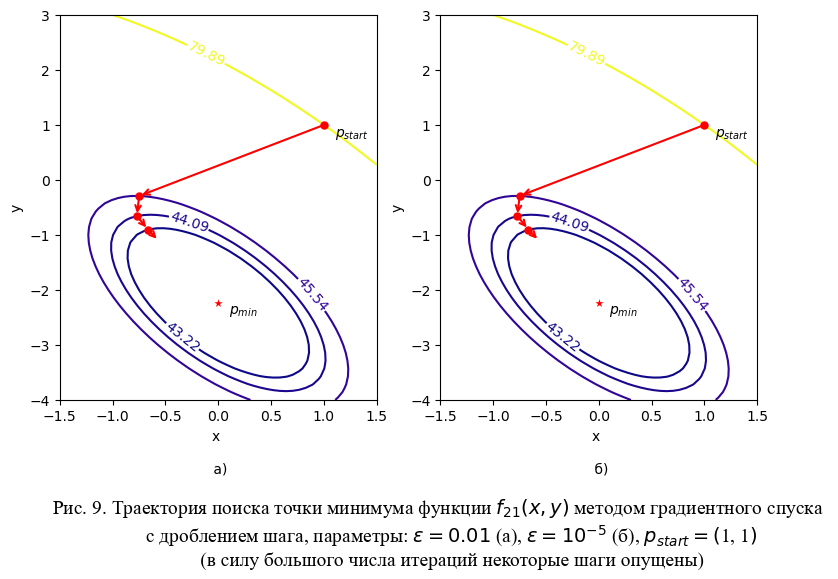

In [520]:
ExperimentPlot2(np.vectorize(f1), xmin=-1.5, xmax=1.5, 
               ymin=-4, ymax=3, n1=4, n2=4, xs1=xs2_f1, ys1=ys2_f1,
               xs2=xs3_f1, ys2=ys3_f1, ind=9, xstart=1, ystart=1,
              xspacing=0.1, yspacing=0.2, fnum=21)

In [494]:
xmin0_f21, ymin0_f21, fmin0_f21, xs0_f21, ys0_f21, its0_f21, fls0_f21, grs0_f21 = InfoStepSplitDescentMinSearch(f21, eps1, -5, 2, 0.98)

In [495]:
xmin1_f21, ymin1_f21, fmin1_f21, xs1_f21, ys1_f21, its1_f21, fls1_f21, grs1_f21 = InfoStepSplitDescentMinSearch(f21, eps2, -5, 2, 0.98)

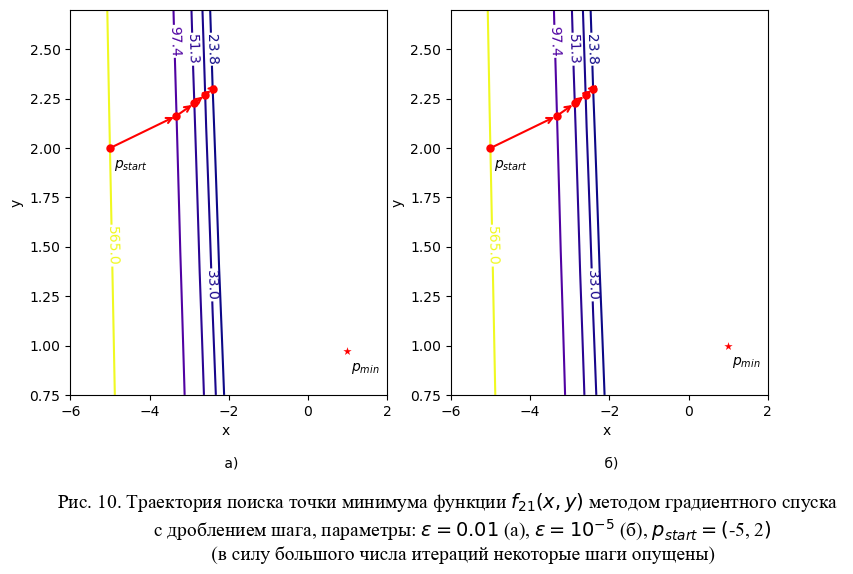

In [536]:
ExperimentPlot2(np.vectorize(f21), xmin=-6, xmax=2, 
               ymin=0.75, ymax=2.7, n1=5, n2=5, xs1=xs0_f21, ys1=ys0_f21,
               xs2=xs1_f21, ys2=ys1_f21, ind=10, xstart=-5, ystart=2,
              xspacing=0.1, yspacing=0.1, fnum=21)

In [528]:
xmin2_f21, ymin2_f21, fmin2_f21, xs2_f21, ys2_f21, its2_f21, fls2_f21, grs2_f21 = InfoStepSplitDescentMinSearch(f21, eps1, 1.5, 1.5, 0.98)

In [529]:
xmin3_f21, ymin3_f21, fmin3_f21, xs3_f21, ys3_f21, its3_f21, fls3_f21, grs3_f21 = InfoStepSplitDescentMinSearch(f21, eps2, 1.5, 1.5, 0.98)

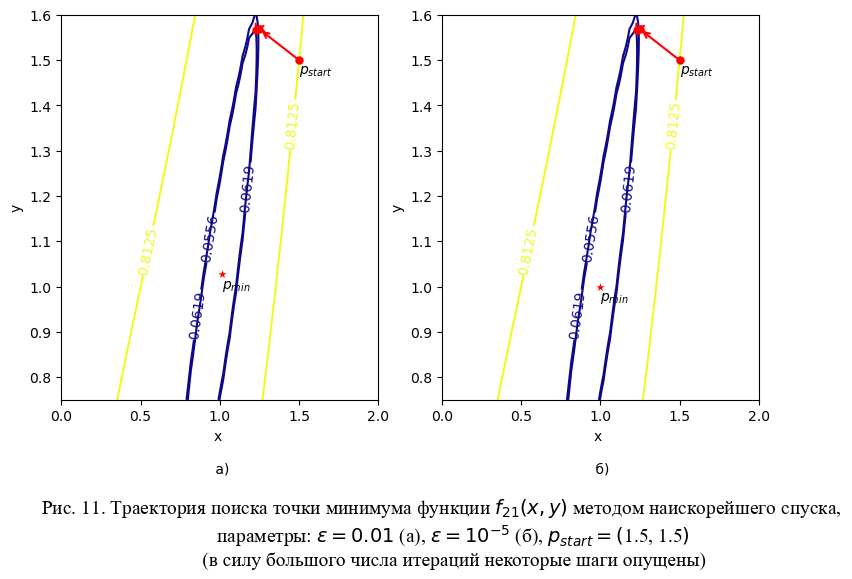

In [537]:
ExperimentPlot(np.vectorize(f21), xmin=0, xmax=2, 
               ymin=0.75, ymax=1.6, n1=3, n2=3, xs1=xs2_f21, ys1=ys2_f21,
               xs2=xs3_f21, ys2=ys3_f21, ind=11, xstart=1.5, ystart=1.5,
              xspacing=0, yspacing=0.03, fnum=21)

In [531]:
xmin0_f22, ymin0_f22, fmin0_f22, xs0_f22, ys0_f22, its0_f22, fls0_f22, grs0_f22 = InfoStepSplitDescentMinSearch(f22, eps1, -1.2, 1.7,0.98)

In [532]:
xmin1_f22, ymin1_f22, fmin1_f22, xs1_f22, ys1_f22, its1_f22, fls1_f22, grs1_f22 = InfoStepSplitDescentMinSearch(f22, eps2, -1.2, 1.7,0.98)

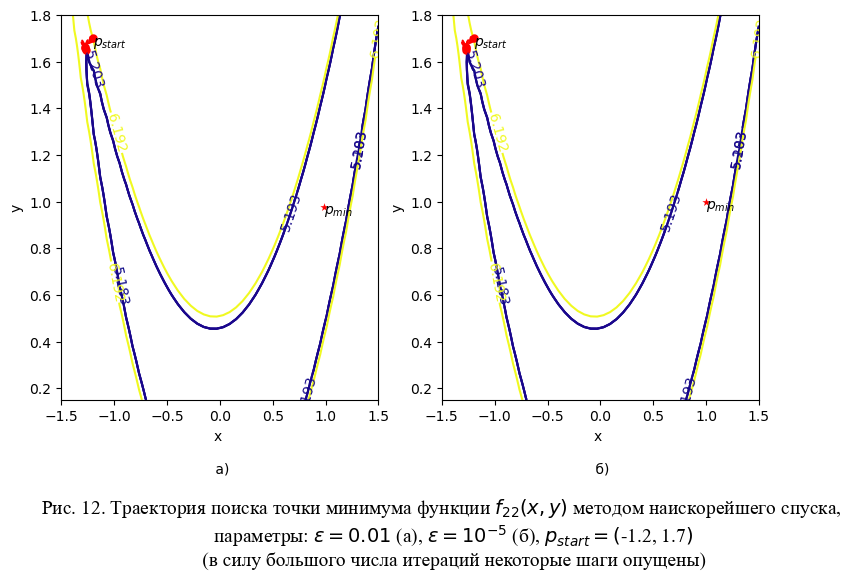

In [538]:
ExperimentPlot(np.vectorize(f22), xmin=-1.5, xmax=1.5, 
               ymin=0.15, ymax=1.8, n1=4, n2=4, xs1=xs0_f22, ys1=ys0_f22,
               xs2=xs1_f22, ys2=ys1_f22, ind=12, xstart=-1.2, ystart=1.7,
              xspacing=0, yspacing=0.03, fnum=22)

In [500]:
import pandas as pd
from IPython.display import HTML

#      # точность / нач точка / кол-во итераций / кол-во вычисленных значений / точка минимума / мин знач / 
# f1
# f21
# f22
funcs = ['f1(x, y)','f1(x, y)','f1(x, y)','f1(x, y)',
         'f21(x, y)', 'f21(x, y)','f21(x, y)', 'f21(x, y)',
         'f22(x, y)','f22(x, y)']
prec = [format(el, '0.1e') for el in [eps1, eps2]]
itercounts = [its0_f1, its1_f1, its2_f1, its3_f1, its0_f21, its1_f21, its2_f21, its3_f21, its0_f22, its1_f22]
funcvals = [fls0_f1, fls1_f1, fls2_f1, fls3_f1, fls0_f21, fls1_f21, fls2_f21, fls3_f21, fls0_f22, fls1_f22]
gradcalls = [grs0_f1, grs1_f1, grs2_f1, grs3_f1, grs0_f21, grs1_f21, grs2_f21, grs3_f21, grs0_f22, grs1_f22]
xmins = [xmin0_f1, xmin1_f1, xmin2_f1, xmin3_f1, xmin0_f21, xmin1_f21, xmin2_f21, xmin3_f21, xmin0_f22, xmin1_f22]
ymins = [ymin0_f1, ymin1_f1, ymin2_f1, ymin3_f1, ymin0_f21, ymin1_f21, ymin2_f21, ymin3_f21, ymin0_f22, ymin1_f22]
fmins = [fmin0_f1, fmin1_f1, fmin2_f1, fmin3_f1, fmin0_f21, fmin1_f21, fmin2_f21, fmin3_f21, fmin0_f22, fmin1_f22]
df1 = pd.DataFrame({"Функция": funcs,
                    "Точность": [prec[0], prec[1], prec[0], prec[1],prec[0], prec[1],
                                prec[0], prec[1], prec[0], prec[1]],
                    "Начальная точка": ['(10, 10)', '(10, 10)', '(1, 1)', '(1, 1)', '(-5, 2)', '(-5, 2)', 
                                        '(1.5, 1.5)', '(1.5, 1.5)', '(-1.2, 1.7)', '(-1.2, 1.7)'],
                    "Кол-во итераций": [elem for elem in itercounts], 
                    "Кол-во вычисленных значений целевой функции": [elem for elem in funcvals],
                    "Кол-во вычисленных градиентов": [elem for elem in gradcalls],
                    "Точка минимума": [f'({xmins[0]: 0.1f}, {ymins[0]: 0.1f})',
                                     f'({xmins[1]: 0.5f}, {ymins[1]: 0.5f})',
                                     f'({xmins[2]: 0.1f}, {ymins[2]: 0.1f})',
                                     f'({xmins[3]: 0.5f}, {ymins[3]: 0.5f})',
                                     f'({xmins[4]: 0.1f}, {ymins[4]: 0.1f})',
                                     f'({xmins[5]: 0.5f}, {ymins[5]: 0.5f})',
                                     f'({xmins[6]: 0.1f}, {ymins[6]: 0.1f})',
                                     f'({xmins[7]: 0.5f}, {ymins[7]: 0.5f})',
                                     f'({xmins[8]: 0.1f}, {ymins[8]: 0.1f})',
                                     f'({xmins[9]: 0.5f}, {ymins[9]: 0.5f})'],
                    "Минимальное значение функции": [f'{fmins[0]: 0.1f}',
                                                f'{fmins[1]: 0.5f}',
                                                f'{fmins[2]: 0.1f}',
                                                f'{fmins[3]: 0.5f}',
                                                f'{fmins[4]: 0.1f}',
                                                f'{fmins[5]: 0.5f}',
                                                f'{fmins[6]: 0.1f}',
                                                f'{fmins[7]: 0.5f}',
                                                f'{fmins[8]: 0.1f}',
                                                f'{fmins[9]: 0.5f}']
                   })
s1 = df1.style.hide(axis="index").set_caption("Табл. 2. Результаты поиска минимумов функций методом градиентного спуска с дроблением шага")
cell_hover = {  # for row hover use <tr> instead of <td>
    'selector': 'td:hover',
    'props': [('background-color', '#ffffb3')]
}
headers = {
    'selector': 'th:not(.index_name)',
    'props': 'background-color: #000066; color: white;'
}
s1.set_table_styles([cell_hover, headers])
s1.set_table_styles([
    {'selector': 'th.col_heading', 'props': 'text-align: center;'},
    {'selector': 'th.col_heading.level0', 'props': 'font-size: 1.4em;'},
    {'selector': 'td', 'props': 'text-align: center; font-weight: bold; font-size: 16px;'},
    #{'selector': 'td:nth-child(4)', 'props': 'text-align: left; font-weight: bold; font-size: 16px'},
    #{'selector': 'td:nth-child(5)', 'props': 'text-align: left; font-weight: bold; font-size: 16px;'},
    {'selector': 'caption', 'props': [('color', 'black'),('font-size', '18px'),('text-align','right'),
                                     ('font-family', 'Times New Roman')]},
], overwrite=False)
s1.set_table_styles([{'selector': 'th', 'props': 'border-left: 1px solid white'},
            {'selector': 'td', 'props': 'border-left: 1px solid #000066'}], overwrite=False)

s1

Функция,Точность,Начальная точка,Кол-во итераций,Кол-во вычисленных значений целевой функции,Кол-во вычисленных градиентов,Точка минимума,Минимальное значение функции
"f1(x, y)",1.0e-02,"(10, 10)",44,10,45,"(-0.0, -2.2)",41.0
"f1(x, y)",1.0e-05,"(10, 10)",86,10,87,"(-0.00000, -2.23606)",41.00000
"f1(x, y)",1.0e-02,"(1, 1)",38,10,39,"(-0.0, -2.2)",41.0
"f1(x, y)",1.0e-05,"(1, 1)",80,10,81,"(-0.00000, -2.23606)",41.00000
"f21(x, y)",1.0e-02,"(-5, 2)",2887,22,2888,"( 1.0, 1.0)",0.0
"f21(x, y)",1.0e-05,"(-5, 2)",8526,22,8527,"( 0.99999, 0.99997)",0.00000
"f21(x, y)",1.0e-02,"(1.5, 1.5)",209,12,210,"( 1.0, 1.0)",0.0
"f21(x, y)",1.0e-05,"(1.5, 1.5)",648,12,649,"( 1.00001, 1.00003)",0.00000
"f22(x, y)",1.0e-02,"(-1.2, 1.7)",2672,22,2673,"( 1.0, 1.0)",0.0
"f22(x, y)",1.0e-05,"(-1.2, 1.7)",7548,22,7549,"( 0.99999, 0.99998)",0.00000


# Выводы

В результате численных экспериментов были сделаны следующие выводы. 

Во-первых, на стоимость обоих методов влияет точность поиска: с повышением этого параметра увеличивается количество вычисленных значений целевой функции и градиента (однако бывают и частные случаи, как например при поиске минимума функции $f_1(x,y)$ методом наискорейшего спуска с начальным приближением $(10, 10)$).

Во-вторых, выбор начальной точки также оказывает существенное влияние на стоимость: при улучшении начального приближения (уменьшении нормы вектора $\|\vec p_{start}-\vec p_{min}\|$ ) число вычисленных значений целевой функции и градиента уменьшается.

В-третьих, необходимо учитывать и выпуклость функции при теоретической оценки стоимости метода. Из экспериментов видно, что при переходе от квадратичной функции к функции Розенброка увеличивается число вычисленных значений целевой функции и градиента.

В-четвёртых, нужно иметь ввиду и овражность функции. Так, в ходе эксперимента было установлено, что при повышении параметра овражности $\alpha$ функции Розенброка увеличивается число вычислений целевой функции и&nbsp;градиентов для поиска минимума.

Сравнивая реализованные методы между собой, можно предположить, что метод градиентного спуска с&nbspдроблением шага требует меньшего количества вычисленных значений целевой функции по сравнению с&nbspметодом наискорейшего спуска. Хоть спуск с дроблением шага и требует значительно большего количества вычислений градиента, сумма вычислений целевой функции и градиента всё равно оказывается меньшей в этом методе.